## Web Coverage Service : Example using Python Client : OWSLib 

In [2]:
%matplotlib inline
# Import WCS from owslib
from owslib.wcs import WebCoverageService
import matplotlib.pyplot as plt
from osgeo import gdal

### PAVICS : Synthèse 2015 Ouranos: 
* With WCS we want to access the data not just a map

In [9]:
wcs_url = 'http://geo.weather.gc.ca/geomet/?lang=en&service=WCS'
#wcs_url = 'http://boreas.ouranos.ca:8087/geoserver/wcs'
# connection
wcs = WebCoverageService(wcs_url,version='1.0.0')
print(wcs.identification.title)

Meteorological Service of Canada Geospatial Web Services 2.0.6


#### 1 - Let's list some of the contents : 

In [15]:
# List some metadata
for c in wcs.contents:
    print(c)



HRDPA.6F_PR
HRDPA.6P_PR
HRDPA.24F_PR
HRDPA.24P_PR
HRDPS.CONTINENTAL.PRES_ES.50
HRDPS.CONTINENTAL.PRES_ES.100
HRDPS.CONTINENTAL.PRES_ES.150
HRDPS.CONTINENTAL.PRES_ES.175
HRDPS.CONTINENTAL.PRES_ES.200
HRDPS.CONTINENTAL.PRES_ES.225
HRDPS.CONTINENTAL.PRES_ES.250
HRDPS.CONTINENTAL.PRES_ES.275
HRDPS.CONTINENTAL.PRES_ES.300
HRDPS.CONTINENTAL.PRES_ES.350
HRDPS.CONTINENTAL.PRES_ES.400
HRDPS.CONTINENTAL.PRES_ES.450
HRDPS.CONTINENTAL.PRES_ES.500
HRDPS.CONTINENTAL.PRES_ES.550
HRDPS.CONTINENTAL.PRES_ES.600
HRDPS.CONTINENTAL.PRES_ES.650
HRDPS.CONTINENTAL.PRES_ES.700
HRDPS.CONTINENTAL.PRES_ES.750
HRDPS.CONTINENTAL.PRES_ES.800
HRDPS.CONTINENTAL.PRES_ES.850
HRDPS.CONTINENTAL.PRES_ES.875
HRDPS.CONTINENTAL.PRES_ES.900
HRDPS.CONTINENTAL.PRES_ES.925
HRDPS.CONTINENTAL.PRES_ES.950
HRDPS.CONTINENTAL.PRES_ES.970
HRDPS.CONTINENTAL.PRES_ES.985
HRDPS.CONTINENTAL.PRES_ES.1000
HRDPS.CONTINENTAL.PRES_ES.1015
HRDPS.CONTINENTAL.PRES_GZ.50
HRDPS.CONTINENTAL.PRES_GZ.100
HRDPS.CONTINENTAL.PRES_GZ.200
HRDPS.CONTINENTAL.PR

REPS.DIAG.24_T8.ERC75
REPS.DIAG.24_T8.ERC90
REPS.DIAG.24_T8.ERC100
REPS.DIAG.24_T8.ERGE0
REPS.DIAG.24_T8.ERGE5
REPS.DIAG.24_T8.ERGE10
REPS.DIAG.24_T8.ERGE15
REPS.DIAG.24_T8.ERGE20
REPS.DIAG.24_T8.ERGE25
REPS.DIAG.24_T8.ERGE30
REPS.DIAG.24_T8.ERGE35
REPS.DIAG.24_T8.ERGE40
REPS.DIAG.24_T8.ERGE-5
REPS.DIAG.24_T8.ERGE-10
REPS.DIAG.24_T8.ERGE-15
REPS.DIAG.24_T8.ERGE-20
REPS.DIAG.24_T8.ERGE-25
REPS.DIAG.24_T8.ERGE-30
REPS.DIAG.24_T8.ERMEAN
REPS.DIAG.24_WCF.ERC0
REPS.DIAG.24_WCF.ERC10
REPS.DIAG.24_WCF.ERC25
REPS.DIAG.24_WCF.ERC50
REPS.DIAG.24_WCF.ERC75
REPS.DIAG.24_WCF.ERC90
REPS.DIAG.24_WCF.ERC100
REPS.DIAG.24_WCF.ERGE0
REPS.DIAG.24_WCF.ERGE5
REPS.DIAG.24_WCF.ERGE10
REPS.DIAG.24_WCF.ERGE15
REPS.DIAG.24_WCF.ERGE20
REPS.DIAG.24_WCF.ERGE25
REPS.DIAG.24_WCF.ERGE30
REPS.DIAG.24_WCF.ERGE35
REPS.DIAG.24_WCF.ERGE40
REPS.DIAG.24_WCF.ERGE45
REPS.DIAG.24_WCF.ERGE50
REPS.DIAG.24_WCF.ERMEAN
REPS.DIAG.24_WCF.ERSSTD
REPS.DIAG.48_PRMM.ERC10
REPS.DIAG.48_PRMM.ERC25
REPS.DIAG.48_PRMM.ERC50
REPS.DIAG.48_PRMM.E

#### 2 - Let's try to get some data

In [16]:
layerid = 'OCEAN.GIOPS.3D_SALW_0000'
temp = wcs[layerid]
#Title
print('Layer title :', temp.title)
#bounding box
print('BoundingBox :', temp.boundingBoxWGS84)
# supported data formats - we'll use geotiff
print('Formats :', temp.supportedFormats)
#grid dimensions
print('Grid upper limits :', temp.grid.highlimits)

Layer title : OCEAN.GIOPS.3D - Sea water salinity - 0000m
BoundingBox : (-180.0, -80.1, 180.0, 89.9)
Formats : ['GEOTIFF_16', 'AAIGRID']
Grid upper limits : ['1799', '849']


#### 3 - Create WCS inputs

In [22]:
format_wcs = temp.supportedFormats[0]
print(format_wcs)
bbox_wcs = temp.boundingboxes[0]['bbox'] # Get the entire domain
print(bbox_wcs)
crs_wcs = temp.boundingboxes[0]['nativeSrs'] # Coordinate system
print(crs_wcs)
w = int(temp.grid.highlimits[0] )
print(w)
h = int(temp.grid.highlimits[1])
print(h)

GEOTIFF_16
(-180.0, -80.1, 180.0, 89.9)
EPSG:4326
1799
849


#### 4 - Request and download the data via WCS

In [23]:
output=wcs.getCoverage(identifier=layerid,crs=crs_wcs,bbox=bbox_wcs,
                       width=w,height=h,format=format_wcs)
out_tiff = './output/' + layerid + '.tiff'
f=open(out_tiff,'wb')
f.write(output.read())
f.close()


#### 5 - Load and display the data

./output/OCEAN.GIOPS.3D_SALW_0000.tiff
<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f58f0faf180> >


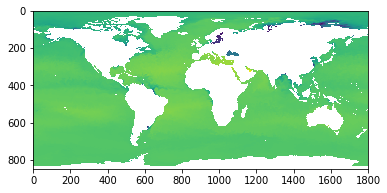

In [24]:
print(out_tiff)
ds = gdal.Open(out_tiff)
print(ds)
arr = ds.ReadAsArray()
arr[arr==0]='nan'
#print(ds)
plt.imshow(arr) #Not working - inline option unavailable?